In [0]:
import numpy as np 
import sklearn as sk
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale 
import seaborn as sns

In [28]:
df = pd.read_csv('creditcard.csv',low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,160738.0,1.934014,-0.053551,-1.882719,0.401100,0.330461,-0.823808,0.171820,-0.222863,0.954528,-0.937906,-0.503225,0.401704,0.267641,-1.674380,-0.098205,0.075506,1.106340,0.114651,0.139303,-0.013814,-0.230873,-0.539803,0.153151,0.546252,-0.036761,-0.124400,-0.017837,-0.001952,64.00,0
1,172467.0,2.179085,-0.721181,-1.449991,-0.861837,-0.601180,-1.583271,-0.136046,-0.426089,-0.558717,0.877516,-0.663833,-1.021656,-0.777275,0.350233,0.337807,0.893741,0.261442,-1.661314,0.661142,-0.047482,0.056372,0.009976,0.203852,0.021188,-0.108279,-0.316927,-0.059072,-0.059345,39.90,0
2,147497.0,-0.133983,1.118777,-0.228205,-0.637027,1.064585,-0.673293,1.119774,-0.188557,-0.228793,-0.993512,-0.755227,-0.181898,-0.027845,-0.947554,-0.253156,0.199304,0.413141,-0.242596,-0.160668,-0.127406,-0.203769,-0.582637,0.095951,0.509945,-0.964152,0.026432,0.027270,0.236085,7.13,0
3,118865.0,2.027543,-0.037742,-3.856233,-0.625752,3.109854,2.645836,0.184056,0.526572,-0.200174,-0.254609,0.474382,-0.070448,-0.319646,-0.241217,0.819375,-0.033197,0.529558,-0.273896,-0.348677,-0.043664,0.032566,0.008728,0.025681,0.662746,0.259741,0.632622,-0.089321,-0.054683,40.85,0
4,122654.0,1.999852,-1.128660,0.209440,-0.530183,-1.227929,0.694198,-1.506686,0.324265,3.605142,-1.198039,-2.520906,1.043896,0.311991,-1.305258,-0.852452,-0.705335,-0.169727,0.638872,1.209236,-0.224268,0.066095,0.921168,-0.053583,-0.948984,0.153628,-0.752294,0.167795,-0.030466,0.02,0


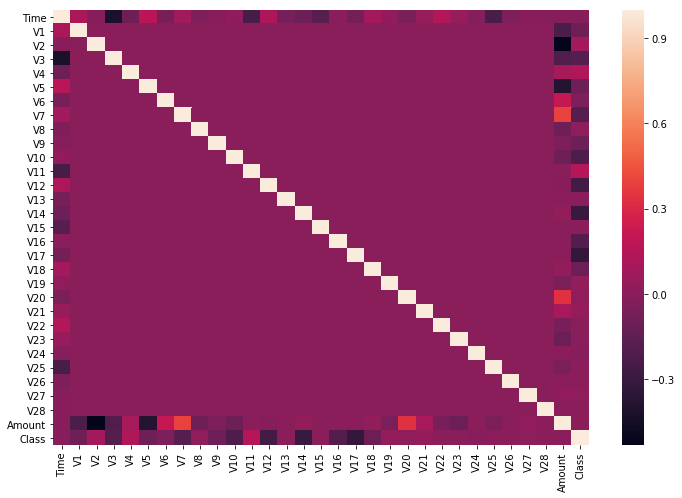

In [29]:
corr = df.corr()

plt.subplots(figsize=(12,8))
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)
plt.show()


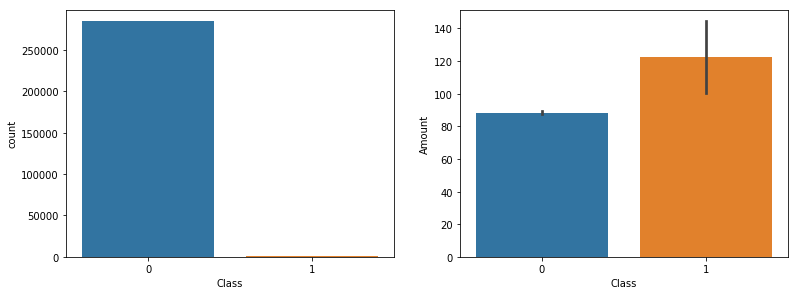

In [30]:
plt.subplots(figsize=(20,25))
plt.subplot(4,3,1)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
sns.countplot(x='Class',data=df)
plt.subplot(4,3,2)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
sns.barplot(x='Class',y='Amount',data=df)
plt.show()

In [31]:
fraud = df.loc[df['Class']==1]
non_fraud = df.loc[df['Class']==0]
print(len(fraud))
print(len(non_fraud))

492
284315


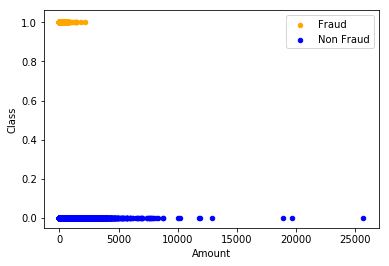

In [32]:
ax = fraud.plot.scatter(x="Amount",y="Class",color='Orange', label='Fraud')
non_fraud.plot.scatter(x="Amount",y="Class",color='Blue' , label='Non Fraud',ax=ax)
plt.show()

In [0]:
#machine learning part 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [0]:
x=df.iloc[:,:-1]
y=df['Class']
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.25,random_state=0,stratify=df['Class'])

In [0]:
Logistic = linear_model.LogisticRegression(C=1e5)

In [39]:
Logistic.fit(X_train,Y_train)

print(X_test,Y_test)
print('score: ', Logistic.score(X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


            Time         V1        V2  ...       V27       V28  Amount
135797   70773.0  -0.308703  0.960608  ...  0.044470  0.010637   22.81
78757   118109.0  -0.624994  0.607372  ...  0.123388  0.193893   66.84
253835   41379.0  -1.503123  1.837721  ...  0.711073  0.378926    1.00
90710   119997.0  -3.895322 -1.234150  ...  0.089030 -0.800991  373.97
201408  141555.0   1.412342 -1.819442  ... -0.135856  0.006613  416.50
272431  117261.0  -0.230792 -0.804460  ...  0.133057  0.159496  111.00
87624   157463.0  -0.978844 -1.446931  ...  0.004380  0.094863  299.00
75716    76964.0   1.204137 -0.169078  ... -0.051296 -0.003691   20.83
260285  130735.0   0.019958  0.775676  ...  0.238903  0.096772   11.48
107045  123412.0  -4.320371 -0.049715  ... -0.123848 -0.572051  113.61
162962   41826.0  -2.694478 -0.695869  ... -0.617459  0.428638  181.55
142942  133290.0   1.626230 -2.352087  ... -0.156290 -0.022063  444.00
150509   77416.0   1.256397 -0.580837  ...  0.014403  0.015470   36.85
112455